Starting Multi-Stock Analysis...
Processing AAPL...
Processing AMZN...
Processing GOOG...
Processing META...
Processing MSFT...
Processing NVDA...


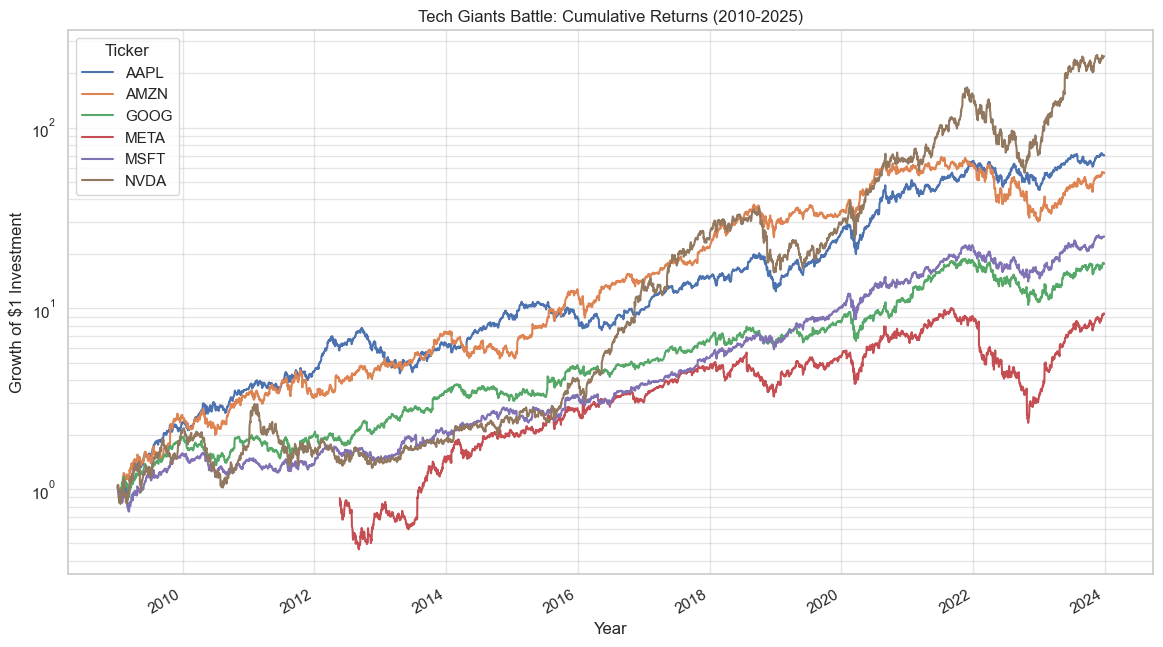


--- Final Value of $1 Investment ---
NVDA    247.917539
AAPL     70.077426
AMZN     55.901400
MSFT     24.958636
GOOG     17.609641
META      9.258698
Name: 2023-12-29 00:00:00, dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

stock_files = ['AAPL.csv', 'AMZN.csv', 'GOOG.csv', 'META.csv', 'MSFT.csv', 'NVDA.csv']

all_stocks_returns = pd.DataFrame()

print("Starting Multi-Stock Analysis...")

for file_name in stock_files:
    file_path = f"../data/{file_name}"
    ticker = file_name.replace('.csv', '')

    try:
        print(f"Processing {ticker}...")
        df = pd.read_csv(file_path)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

        # A. Daily Returns
        df['Daily_Return'] = df['Close'].pct_change()

        # B. Volatility (20-day rolling)
        df['Volatility'] = df['Daily_Return'].rolling(20).std()

        # C. Technical indicators (TA-Lib)
        df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
        df['MACD'], _, _ = talib.MACD(df['Close'])

        # D. Cumulative return
        df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

        # Store for comparison
        all_stocks_returns[ticker] = df['Cumulative_Return']

    except FileNotFoundError:
        print(f"Error: Could not find file {file_path}")

# E. Plot comparison
all_stocks_returns.plot(linewidth=1.5)
plt.title("Tech Giants Battle: Cumulative Returns (2010-2025)")
plt.ylabel("Growth of $1 Investment")
plt.xlabel("Year")
plt.yscale("log")
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.legend(title="Ticker")
plt.show()

# F. Print final results
final_values = all_stocks_returns.iloc[-1].sort_values(ascending=False)
print("\n--- Final Value of $1 Investment ---")
print(final_values)
